In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# seed 값 설정
numpy.random.seed(3)
tf.random.set_seed(3)

In [4]:
df_pre = pd.read_csv('./dataset/wine.csv', header=None)
df = df_pre.sample(frac=0.15)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.00,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.90,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.40,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.80,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.50,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,8.2,0.570,0.26,2.20,0.060,28.0,65.0,0.99590,3.30,0.43,10.10,5,1
2584,6.0,0.410,0.21,1.90,0.050,29.0,122.0,0.99280,3.42,0.52,10.50,6,0
4446,5.8,0.200,0.34,1.00,0.035,40.0,86.0,0.98993,3.50,0.42,11.70,5,0
3471,5.8,0.330,0.20,16.05,0.047,26.0,166.0,0.99760,3.09,0.46,8.90,5,0


In [5]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [6]:
# 모델의 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [8]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

In [9]:
# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [10]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

Train on 653 samples, validate on 322 samples
Epoch 1/3500
653/653 [==============================] - 0s 197us/step - loss: 1.2627 - accuracy: 0.7259 - val_loss: 0.8876 - val_accuracy: 0.7547
Epoch 2/3500
653/653 [==============================] - 0s 11us/step - loss: 1.0749 - accuracy: 0.7259 - val_loss: 0.7603 - val_accuracy: 0.7547
Epoch 3/3500
653/653 [==============================] - 0s 11us/step - loss: 0.9093 - accuracy: 0.7259 - val_loss: 0.6486 - val_accuracy: 0.7547
Epoch 4/3500
653/653 [==============================] - 0s 8us/step - loss: 0.7694 - accuracy: 0.7259 - val_loss: 0.5543 - val_accuracy: 0.7547
Epoch 5/3500
653/653 [==============================] - 0s 8us/step - loss: 0.6502 - accuracy: 0.7259 - val_loss: 0.4783 - val_accuracy: 0.7547
Epoch 6/3500
653/653 [==============================] - 0s 11us/step - loss: 0.5604 - accuracy: 0.7259 - val_loss: 0.4219 - val_accuracy: 0.7547
Epoch 7/3500
653/653 [==============================] - 0s 6us/step - loss: 0.4891 - 

In [17]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']
y_vloss

[0.8875926733016968,
 0.7602843046188354,
 0.6485751271247864,
 0.5543063282966614,
 0.4783065915107727,
 0.4218672811985016,
 0.39463451504707336,
 0.3963862657546997,
 0.41162264347076416,
 0.42008307576179504,
 0.41137319803237915,
 0.3886064887046814,
 0.3638637959957123,
 0.3465290367603302,
 0.3388999402523041,
 0.33633437752723694,
 0.33497920632362366,
 0.3328298330307007,
 0.3297743499279022,
 0.3262011408805847,
 0.32305559515953064,
 0.32148030400276184,
 0.3214530646800995,
 0.32171374559402466,
 0.321171373128891,
 0.3196116089820862,
 0.316535085439682,
 0.3131161332130432,
 0.3100321292877197,
 0.3076155483722687,
 0.30565959215164185,
 0.3039173483848572,
 0.30251750349998474,
 0.3015275001525879,
 0.3009674549102783,
 0.3010394275188446,
 0.3013545870780945,
 0.3013959228992462,
 0.2998729348182678,
 0.2971322536468506,
 0.29348841309547424,
 0.2904675006866455,
 0.2882956862449646,
 0.2865928113460541,
 0.2850552201271057,
 0.2836737632751465,
 0.28258952498435974,
 0

In [18]:
# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy']
y_acc

[0.72588056,
 0.72588056,
 0.72588056,
 0.72588056,
 0.72588056,
 0.72588056,
 0.72588056,
 0.72588056,
 0.72588056,
 0.7304747,
 0.7488515,
 0.7595712,
 0.7672282,
 0.7641654,
 0.75038284,
 0.7442573,
 0.7350689,
 0.7335375,
 0.73966306,
 0.75038284,
 0.7672282,
 0.7886677,
 0.805513,
 0.8192956,
 0.82542115,
 0.84379786,
 0.85451764,
 0.8606432,
 0.8606432,
 0.863706,
 0.86523736,
 0.87289435,
 0.8774885,
 0.8790199,
 0.88361406,
 0.89127105,
 0.90199083,
 0.90964776,
 0.9111792,
 0.90964776,
 0.91271055,
 0.9111792,
 0.9081164,
 0.9081164,
 0.91271055,
 0.91271055,
 0.91424197,
 0.91271055,
 0.91271055,
 0.91577333,
 0.91730475,
 0.91730475,
 0.9188361,
 0.9234303,
 0.9234303,
 0.9234303,
 0.9249617,
 0.9234303,
 0.9249617,
 0.9249617,
 0.9249617,
 0.92802453,
 0.9295559,
 0.92802453,
 0.92802453,
 0.92802453,
 0.92802453,
 0.92802453,
 0.92802453,
 0.92802453,
 0.92802453,
 0.9264931,
 0.9264931,
 0.92802453,
 0.92802453,
 0.9264931,
 0.9264931,
 0.9264931,
 0.9264931,
 0.9295559,


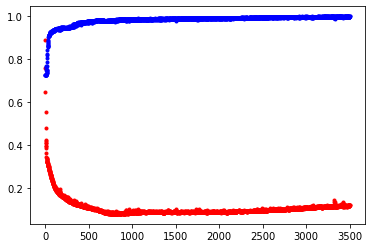

In [19]:
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()